# EXPORT SHARES: UKRAINIAN AGRICULTURAL EXPORTS

Name: Josemaria Macedo Carrillo\
Created: 08/07/23\
Last modified: 01/18/24\
DSI

The purpose of this notebook is to analyze data on Ukrainian agricultural
exports for October 2022 (busiest month according to BSGI). The main data sources
are the Black Sea Grain Initiative (BSGI) of the United
Nations and Import Genius (IG), a website that has trade data for different countries
including Ukraine.

In [1]:
import sys
sys.path.append('..')
import pandas as pd
from utils.nb_plots import plot_all_period, plot_pc_monthly
from utils.clean_data import export_csv
import os
from config import CLEAN_FILES, IG_FILES_PATH

## TOTAL EXPORTS BY COMPANY

### PIE CHART FOR WHOLE PERIOD (August 2022 -  March 2023)

We get the data from Import Genius (IG) and Black Sea Grain Initiative (BSGI) for some countries ("asia", "spain" or "belgium").

In [2]:
country = "spain"
file = CLEAN_FILES[country]
path = os.path.join(IG_FILES_PATH, file)
ig = pd.read_csv(path)

Plot export shares for the whole period (August 2022 until March 2023)

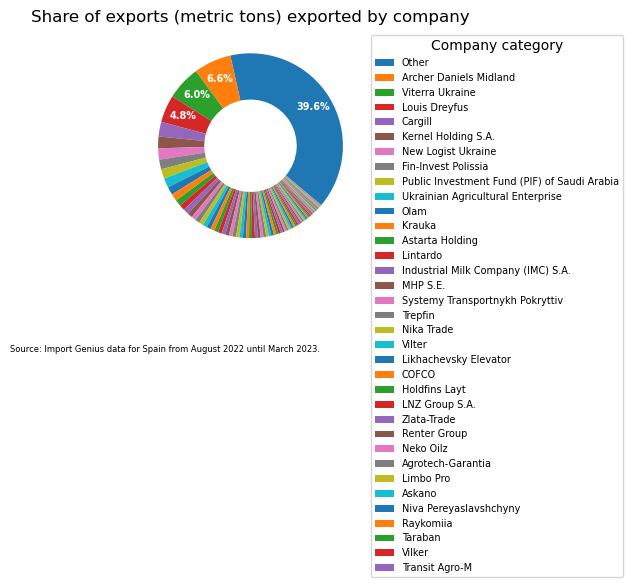

,company_std,weight_ton
0,Other,1843471.137
1,Archer Daniels Midland,305326.560
2,Viterra Ukraine,278390.438
3,Louis Dreyfus,223059.678
4,Cargill,118735.382
...,...,...
85,Olyshchivka,1295.600
86,Agrocomplex,1061.012
87,KSG Agro SA,841.568
88,Karla Marksa 2,566.795


In [3]:
# TODO: Use keyword arguments if it's not obvious what something is - 2, .5 for example
data_source = f"Import Genius data for {country.capitalize()} from August 2022 until March 2023"

export_shares_all = plot_all_period(ig, data_source, min_wedge_percentage=3, min_legend_percentage=.5)
export_shares_all

We plot exports now by month.

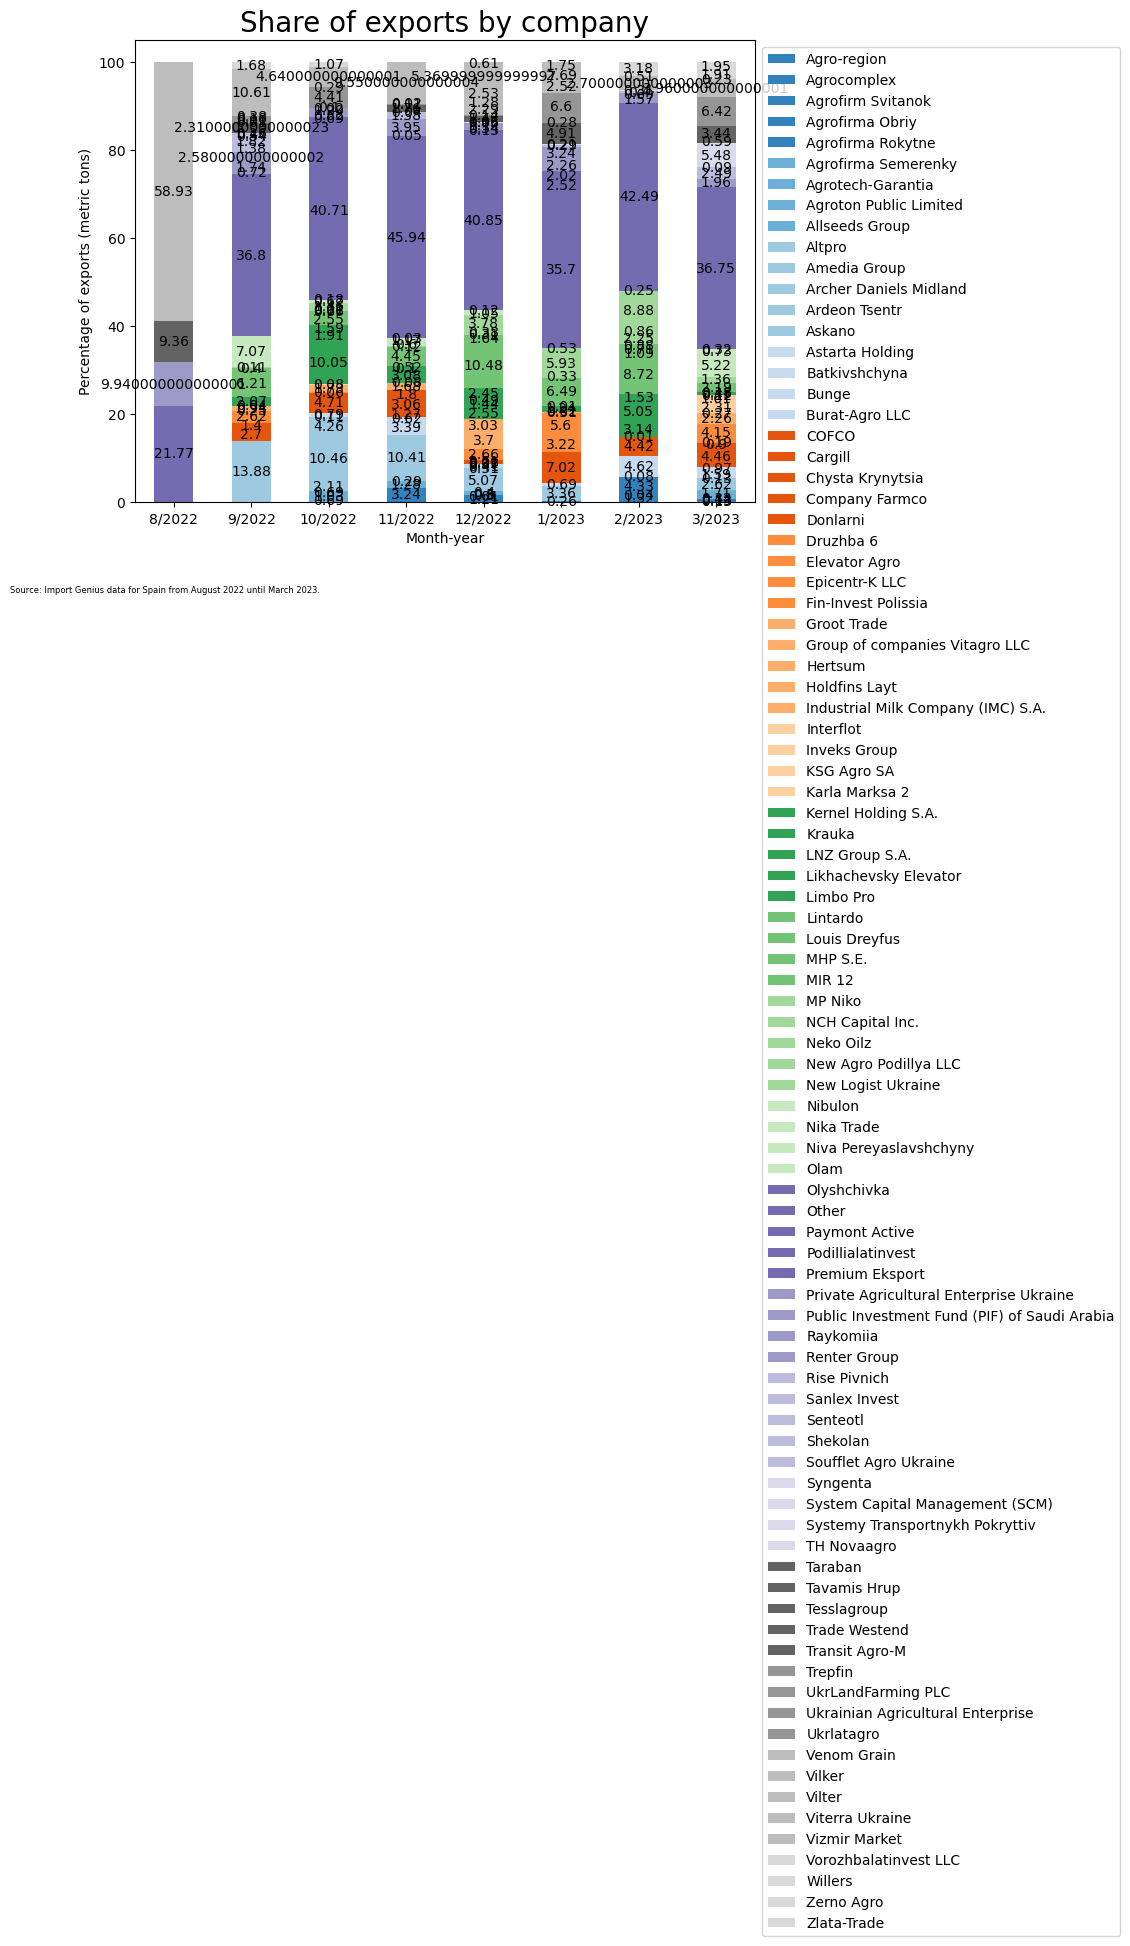

In [4]:
grouping_cols = ["year", "month", "company_std"]
other_cols = ["weight_ton"]
sort_by = ["year", "month", "company_std"]
aggregate_by = {"weight_ton": "sum"}
x_title = "Month-year"
y_title = "Percentage of exports (metric tons)"
plot_title = "Share of exports by company"
x_axis_ticks = "date"


plot_pc_monthly(df=ig, group=grouping_cols, agg_cols=other_cols,
                sort=sort_by, asc_bool=True, agg_dict=aggregate_by,
                x_title=x_title, y_title=y_title, plot_title=plot_title,
                x_axis_ticks=x_axis_ticks, data_source=data_source)

## TABLE WITH EXPORTS BY COMPANY (ALL COMPANIES INCLUDED)

In [6]:
file_name = f"total_exports_by_company_{country}.csv"
export_csv(ig, file_name)

/Users/jmacedoc/Documents/DSI/Ukraine-Agricultural-Exports/oakland-institute-ukraine/notebooks/../utils/clean_data.py:231: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column.lower() + "_gt"] = df[column].apply(lambda x: d[x])


We only keep the columns that we care about which are the subsidiary name, parent company name and weight of exported commodities by the subsidiary.